Welcome to today's session!

I hope all of you are doing well. Today, we will be discussing feature engineering,various encoding techniques. We will dive into these topics in detail and explore how they contribute to building efficient models. 🔍

I hope you're all excited about the session! 🎉 I encourage everyone to be interactive during the session so that we can make it as productive as possible! 🤝💬

Looking forward to a great discussion! 😊

# **Different Different types of Encoding Techniques**

**Key Takeaways:**

Label Encoding: Converts categories into numbers but may imply an order.

Ordinal Encoding: Converts categories into numbers while preserving their order (useful for ordinal data like size).

One-Hot Encoding: Creates new binary columns for each category, removing any implied order, making it suitable for nominal data.

In [ ]:
import pandas as pd
data={"Color":["Red","Blue" , "Red","Black"]   , "Size":["Large","Small","Medium" ,"Large" ],
      "Maritial status" :["Single","Married" , "Relationship" , "Single"]}
df=pd.DataFrame(data)
df

,Color,Size,Maritial status
0,Red,Large,Single
1,Blue,Small,Married
2,Red,Medium,Relationship
3,Black,Large,Single


In [ ]:
# Label Encoding in Color column - Follow ALPHABETICAL ORDER

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Color"]=le.fit_transform(df["Color"])
df

,Color,Size,Maritial status
0,2,Large,Single
1,1,Small,Married
2,2,Medium,Relationship
3,0,Large,Single


In [ ]:
# Ordinal Encoding in Size column
'''
Small = 0
Medium = 1
Large = 2
'''
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[["Small" , "Medium" ,"Large"]])  # Manully define the order [0,1,2]
df["Size"]=oe.fit_transform(df[["Size"]])
df

,Color,Size,Maritial status
0,2,2.0,Single
1,1,0.0,Married
2,2,1.0,Relationship
3,0,2.0,Single


In [ ]:
# 1 hot Encoding in Maritial status column
df=pd.get_dummies(df ,columns=["Maritial status"])
df

,Color,Size,Maritial status_Married,Maritial status_Relationship,Maritial status_Single
0,2,2.0,False,False,True
1,1,0.0,True,False,False
2,2,1.0,False,True,False
3,0,2.0,False,False,True


# **Different Different types of Dimensionality Reduction Techniques**
Imagine you have a big table of data with many columns, each representing different information about something. Sometimes, not all columns (or features) are useful. Dimensionality reduction is the process of reducing the number of columns while keeping the important information. This helps make calculations faster, models simpler, and results easier to interpret.


No of column increase = Complexity of model increase = Accuracy decrease

No of column decrease = Complexity of model decrease = Accuracy increase

#Feature Selection

Feature Selection is like picking the most important columns from the table and ignoring the rest. For example:

**VIF (Variance Inflation Factor):** Helps remove features that are very similar to each other, so your model doesn’t get confused.

**RFE (Recursive Feature Elimination):** Tests features one by one to see which are the most important and removes the less useful ones.

Analogy: Imagine packing for a trip. You only select the items (features) you really need and leave behind unnecessary things to make your bag lighter.

#Feature Extraction
Feature Extraction creates new features by combining or transforming the existing ones. Instead of just picking columns, it makes new columns that summarize the original data. For example:

**PCA (Principal Component Analysis):** Combines the columns into fewer new ones that capture the most information.

**LDA (Linear Discriminant Analysis):** Creates new features to better separate different groups in the data.

Analogy: It’s like taking the ingredients in your kitchen and making a smoothie. You don’t see the individual ingredients anymore, but the smoothie still has all their nutrients.

**Summary:**

**Feature Selection: Choosing the best existing features.**

**Feature Extraction: Creating new features from the old ones.**

**Both reduce dimensionality, making data easier to work with and models more efficient.**

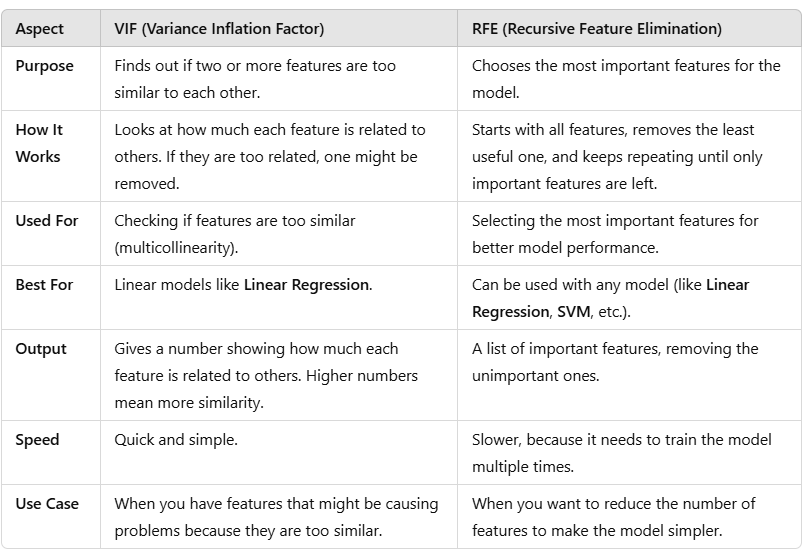

**VIF helps check if features are too similar to each other, while RFE helps pick the most important features for your model.**

# Apply VIF on Linear Regression

In [ ]:
# Homework


# Apply RFE on Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("bank.csv",sep=";")
df

In [ ]:
df.dropna(inplace=True) # To remove null values from data
df.drop_duplicates(inplace=True) # To remove duplicate values from data

# Apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Apply only for object data type column
for i in df.columns:
  if df[i].dtypes=="object":
    df[i]=le.fit_transform(df[i])

# Start with model building WITHOUT RFE
x=df.drop( "y" , axis=1)
y=df["y"]
# Splitting the data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( x, y, test_size=0.2 , random_state=42)
from sklearn.linear_model import LogisticRegression
model1  = LogisticRegression()
# Train the model
model1.fit(x_train , y_train)
# Test the model
y_pred = model1.predict(x_test)
from sklearn.metrics import *
print("Accuracy score of Logistic model is :", accuracy_score(y_pred , y_test)*100)

In [ ]:
# To ignore the unwanted warning
import warnings
warnings.filterwarnings("ignore")

df.dropna(inplace=True) # To remove null values from data
df.drop_duplicates(inplace=True) # To remove duplicate values from data

# Apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Apply only for object data type column
for i in df.columns:
  if df[i].dtypes=="object":
    df[i]=le.fit_transform(df[i])

# Start with model building WITH RFE
x=df.drop( "y" , axis=1)
y=df["y"]

from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model)  # Pass the model inside RFE to apply RFE on it
rfe.fit(x,y)

# RFE will give you the index of column that are important
selected_index = [i for i , data in enumerate(rfe.support_) if data==True]

# Store the column name in a list
column_name = x.columns

# Select the important column name by using column name list and index from previous steps
selected_column_names = [column_name[i] for i in selected_index]

print(selected_column_names)

In [ ]:
x=df.loc[: ,['marital', 'default', 'contact', 'day_of_week', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m'] ]
y=df["y"]
# Splitting the data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( x, y, test_size=0.2 , random_state=42)
from sklearn.linear_model import LogisticRegression
model1  = LogisticRegression()
# Train the model
model1.fit(x_train , y_train)
# Test the model
y_pred = model1.predict(x_test)
from sklearn.metrics import *
print("Accuracy score of Logistic model after applying RFE is :", accuracy_score(y_pred , y_test)*100)